In [1]:
# These will be explained. For now, just run this at the beginning.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Functions

In this notebook we introduce the all-important notion of functions. This will include the typical mathematical definition of a mapping from scalars to scalars, but also for many other kinds of inputs and outputa. 

Unfortunately, defining functions is not as straight-forward as in pure math, but it is quickly taken to. We'll start simply. $$f(x) = x^2$$ 

In [2]:
def f(x):
    return x**2

Function definitions start with the `def` keyword, then the function name and the arguments(s) in parentheses. Don't forget the subsequent colon `:`. Unfortunately (to some), Python is very sensitive to indentation. This forces more readable code but can lead to frustration at times. A function ends when it returns a value. 

In [3]:
f(-9)

81

In [4]:
f(1/2)

0.25

In [5]:
# Here is the most labored definition of the identity function
def there_is_no_need_for_one_letter_functions(or_variables_for_that_matter):
    return or_variables_for_that_matter

Python funcions work on lots of objects, sometimes in ways you might not have anticipated.

In [6]:
v = np.array([1,2,3])
there_is_no_need_for_one_letter_functions(v)

array([1, 2, 3])

In [7]:
# less obvious, so be careful
f(v)

array([1, 4, 9])

## Special functions

Of course, we know far more functions than those that come from basic arithmetical operations, and many of these are already implemented in NumPy.

In [8]:
np.cos(0)

1.0

| mathematics | Python | desciption |
|-------------|--------|------------|
|$\sqrt{x}$ | `np.sqrt(x)` | square root |
|$\sin(t)$ | `np.sin(t)` | sine |
|$\cos(t)$ | `np.cos(t)` | cosine |
|$\tan(t)$ | `np.tan(t)` | tangent |
|$\tan^{-1}(x)$ | `np.arctan(x)` | inverse tangent |
|$e^x$ | `np.exp(x)` | exponential |
|$\ln x$ |`np.log(x)` | natural logarithm |
|$\log_2 x$ |`np.log2(x)` | CS |
|$\log_{10} x$ |`np.log10(x)` | physics |
|$\pi$ |`np.pi` | a famous constant |


**Tip.** To avoid having to remember the `np.` all the time, we can explicitly import specific functions with the following.

In [9]:
from numpy import sin,cos,sqrt,exp,log,pi

In [10]:
sin(3*pi/2) 

-1.0

## Vector-valued functions

Of course functions need not only return a scalar. Recall the spiral curve $$\vec r = \langle t\cos(t) + t\sin(t) \rangle$$

In [11]:
def r(t):
    return t * np.array([cos(t),sin(t)]) 

In [12]:
r(2*pi)

array([ 6.28318531e+00, -1.53893655e-15])

#### Exercise

What is the exact value of $\vec r(2\pi)$? Why was the above printed out?

## Functions of several variables

Functions can be defined with any number of inputs in a straightforward way. Suppose $$f(x,y) = x^2 - x +2y^2$$

In [14]:
def f(x,y):
    return x**2 - x + 2 * y**2

In [15]:
f(-12,4)

188

**Warning.** Note that the code above redefined the variable `f` to this new function. Prior cells referencing it may exhibi incorrect behavior. Though we recycle variables constantly when doing mathematics, it is better to use unique names in a computational setting. Feel free to expand beyond $f$ and $g$ for function names. 

## Plotting

Visualizaion is often key to understanding mathematical objects. We'll use the library [Matplotlib](https://matplotlib.org/), which you can see imported above.

> **Some editorializing.** Matplotlib is powerful and can in fact be used for publication-quality images, but it has many quirks and can be at times difficult to work with. If your main goal is graphing and you are new to this environment, I highly recommend using other, more intuitive options like CalcPlot3D, Geogebra, or many others. 

In this class, we are using the Python environment so that we can (eventually) do some fairly introcate computations that would be difficult otherwise. This plotting section is presented so one can quickly get a picture when mecessary. It is not the main point of this unit. **End of editorializing.**

### A simple 1-D function

Matplotlib is finnicky and somewhat counter-intuitive, especially if you are used to a CAS like _Mathematica_, MATLAB, etc. A plot has a lot of components but at the core are two arrays, of $x$- and $y$-values respectively, which are joined pairwise and in order by sraight line segments. 

Thus to graph a simple sine wave, we first construct a vector of $x$-values using NumPy's `linspace` function. 

In [17]:
x = np.linspace(0,2*pi,100)

`x` is now a vector of 100 $x$-values, starting at $1$ and ending at $2\pi$.

Next we just need a corresponding sequence of $y$-values. 

In [112]:
y = np.sin(x)

**Bad news:** $\sin(x)$ just took a vector as its input. It's not supposed to do that.

**Good news:** NumPy function are _vectorized_; that means when they expecting  a scalar and get a vector, they just act on each component of the vector in turn. This makes for less code, but more for the coder to think about. 

Anyway, now we're ready to actually make the graph. 

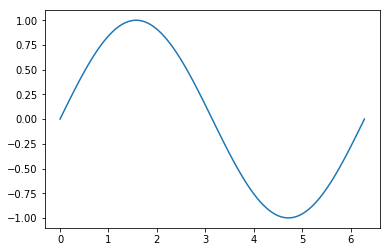

In [114]:
plt.plot(x,y);

And generally we won't need anything fancier than that. here is a lot happening behind the scenes, but two lines, changing formulas as necessary, will suffice for about anuything in this course.

#### EXAMPLE

Sketch the graph $y=e^{-x^2}$ for $x \in [-3,3]$.

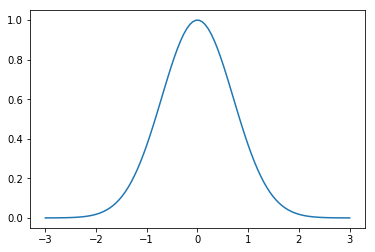

In [118]:
# Solution
x = np.linspace(-3,3,100)
plt.plot(x,exp(-x**2));

### Getting fancy (optional)

Now if such a bare graphic offends your aesthetic sensibilities, you are welcome to explore the rabbithole of the [docs and examples](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html), but you migh consider more pressing obligations.

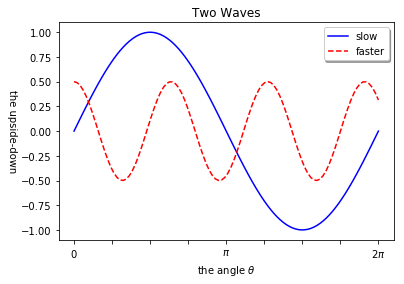

In [146]:
x = np.linspace(0,2*pi,100)
plt.plot(x,sin(x),'b-',x,cos(pi*x)/2,"r--")
plt.title("Two Waves")
plt.xticks(np.linspace(0,2*pi,9),['$0$', '','','', '$\pi$','','','','$2\pi$'])
plt.xlabel('the angle $\\theta$')
plt.ylabel('the upside-down',rotation=270,va='top')
plt.legend(["slow","faster"],shadow=True);

### A curve

Plotting $\vec r(t)$ is similar; we just need to coax the vectors into the right forma for $plot$.

In [19]:
X,Y = np.column_stack([r(t) for t in np.linspace(0,8*pi,400)])

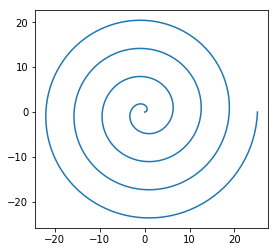

In [22]:
fig, ax = plt.subplots(1)
ax.plot(X,Y)
ax.set_aspect(1);